In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df=pd.read_csv("insurance.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df.duplicated().sum()

np.int64(1)

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [15]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
cat_col=df.select_dtypes(include='object')
print(cat_col)
cat_col['region'].unique()

         sex smoker     region
0     female    yes  southwest
1       male     no  southeast
2       male     no  southeast
3       male     no  northwest
4       male     no  northwest
...      ...    ...        ...
1333    male     no  northwest
1334  female     no  northeast
1335  female     no  southeast
1336  female     no  southwest
1337  female    yes  northwest

[1337 rows x 3 columns]


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
num_col=df.select_dtypes(exclude='object')
num_col

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [18]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
cat_col_encoded=ohe.fit_transform(cat_col).toarray()
cat_col_encoded

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [19]:
column_names=list(ohe.get_feature_names_out())
column_names

['sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [20]:
one_hot=pd.DataFrame(cat_col_encoded,columns=column_names)
one_hot.head()


,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [21]:
one_hot=one_hot.reset_index(drop=True)# to prevent from giving null values after concating 
num_col=num_col.reset_index(drop=True)

In [22]:
final_df=pd.concat([one_hot,num_col],axis=1)
final_df.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19,27.900,0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18,33.770,1,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28,33.000,3,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33,22.705,0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32,28.880,0,3866.85520


In [23]:
x=final_df.drop("charges",axis=1)
y=final_df["charges"]

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_transform=sc.fit_transform(x_train)
x_test_transform=sc.transform(x_test)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
x_train.shape[1]

11

In [28]:
#initialising Sequential
model=Sequential()
# Initialize the model
# Input layer + first hidden layer
#model.add(Dense(    -->no of neurons -> activation -->input dimension ))

model.add(Dense(68, activation="relu", input_dim=x_train_transform.shape[1]))

# Hidden layers
model.add(Dense(32, activation="relu"))
model.add(Dense(24, activation="relu"))
model.add(Dense(12, activation="relu"))

# Output layer
model.add(Dense(1))

import tensorflow as tf
import tensorflow.keras.backend as K


def r2_metric(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae","mse",r2_metric])

# Display model summary
model.summary()

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 68)             │           816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,129 (16.13 KB)

 Trainable params: 4,129 (16.13 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history=model.fit(x_train_transform,
                  y_train,
                  epochs=10,
                  validation_data=(x_test_transform,y_test),
                  )

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 313962240.0000 - mae: 13235.8818 - mse: 313962240.0000 - r2_metric: -1.3700 - val_loss: 387346560.0000 - val_mae: 14269.1445 - val_mse: 387346560.0000 - val_r2_metric: -1.2045
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 308864320.0000 - mae: 12969.6045 - mse: 308864320.0000 - r2_metric: -1.2995 - val_loss: 386755488.0000 - val_mae: 14252.8926 - val_mse: 386755488.0000 - val_r2_metric: -1.2011
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 276899552.0000 - mae: 12409.2109 - mse: 276899552.0000 - r2_metric: -1.3749 - val_loss: 383437152.0000 - val_mae: 14167.6240 - val_mse: 383437152.0000 - val_r2_metric: -1.1821
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 308298560.0000 - mae: 13101.6914 - mse: 308298560.0000 - r2_metric: -1.3223 - val_loss: 369923680.0000 - val_mae: 13837.3438 - val_mse: 369923680.0000 - val_r2_metric: -1.1049
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29807

In [30]:
## prediction
y_pred=model.predict(x_test_transform)
prediction_label=(y_pred>0.5).astype(int).ravel()
prediction_label

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [31]:
# to save model
model.save("Insurance_model.keras")

In [32]:
# If y_test is a DataFrame or 2D array, convert to 1D
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.values.ravel()
elif hasattr(y_test, 'reshape'):
    y_test = y_test.reshape(-1)

# If y_pred is 2D from model.predict, flatten it
y_pred = y_pred.flatten()


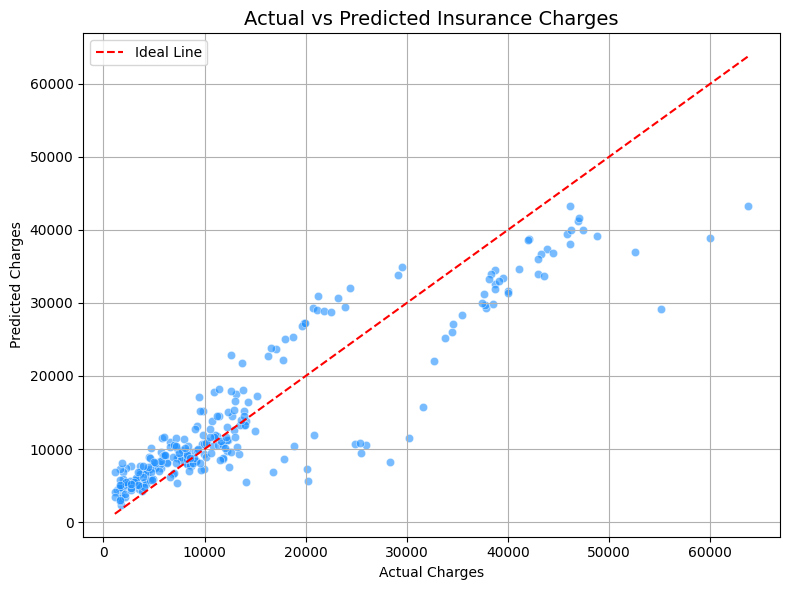

In [33]:
# Create DataFrame
df_plot = pd.DataFrame({
    'Actual Charges': y_test,
    'Predicted Charges': y_pred
})

# Seaborn plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='Actual Charges', y='Predicted Charges', color='dodgerblue', alpha=0.6)
sns.lineplot(x=df_plot['Actual Charges'], y=df_plot['Actual Charges'], color='red', linestyle='--', label='Ideal Line')

plt.title('Actual vs Predicted Insurance Charges', fontsize=14)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.8188961871979471
